### Apply K-MEANS algo on mall_customers data to get customer segmentation based on annual income and spending of the customer.

#### Importing required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

#### Loading the Data Set

In [4]:
df=pd.read_csv("C:\\Users\\rupan\\OneDrive - stu.aud.ac.in\\Desktop\\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Checking shape of data

In [5]:
df.shape

(200, 5)

#### checking missing values

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Statstical Summary

df.describe()

- Taking two features [2-D] spending score and annual score for seggregation.

#### Seggregate X and Y

In [10]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Scatter plot

Text(0, 0.5, 'Spending score')

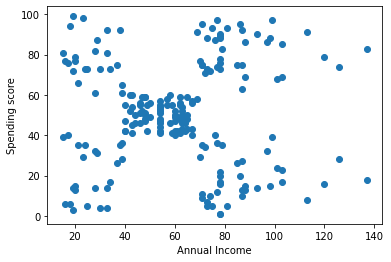

In [11]:
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending score")

In [12]:
kmeans=KMeans()
clusters=kmeans.fit_predict(x)
clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 5, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6])

- By default, 8 clusters.

In [13]:
clusters==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,

- when cluster is 0, cluster value is TRUE.

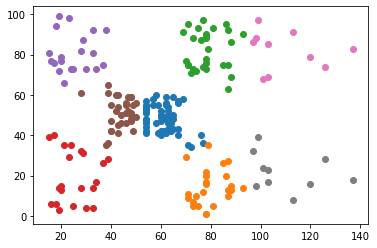

In [16]:
plt.scatter(x[clusters==0]["Annual Income (k$)"],x[clusters==0]["Spending Score (1-100)"])
plt.scatter(x[clusters==1]["Annual Income (k$)"],x[clusters==1]["Spending Score (1-100)"])
plt.scatter(x[clusters==2]["Annual Income (k$)"],x[clusters==2]["Spending Score (1-100)"])
plt.scatter(x[clusters==3]["Annual Income (k$)"],x[clusters==3]["Spending Score (1-100)"])
plt.scatter(x[clusters==4]["Annual Income (k$)"],x[clusters==4]["Spending Score (1-100)"])
plt.scatter(x[clusters==5]["Annual Income (k$)"],x[clusters==5]["Spending Score (1-100)"])
plt.scatter(x[clusters==6]["Annual Income (k$)"],x[clusters==6]["Spending Score (1-100)"])
plt.scatter(x[clusters==7]["Annual Income (k$)"],x[clusters==7]["Spending Score (1-100)"])

In [17]:
silhouette_score(x,kmeans.labels_)

0.45798247238543666

- Not so good, bcz separation is not good.

In [19]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\rupan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30227.606513152015,
 25022.48500453035,
 21838.863692828912]

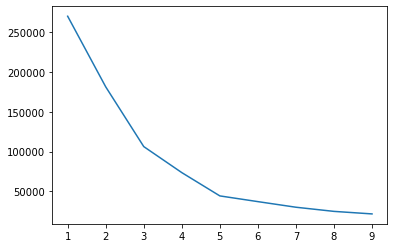

In [20]:
plt.plot(list(range(1,10)),wcss)

- 5 could be optimal no of K for this scenario.

In [21]:
kmeans=KMeans(n_clusters=5)
clusters=kmeans.fit_predict(x)
clusters

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

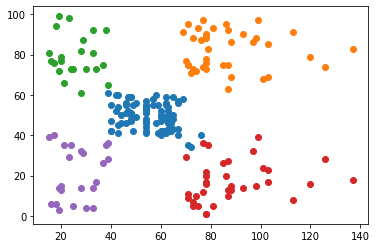

In [24]:
plt.scatter(x[clusters==0]["Annual Income (k$)"],x[clusters==0]["Spending Score (1-100)"])
plt.scatter(x[clusters==1]["Annual Income (k$)"],x[clusters==1]["Spending Score (1-100)"])
plt.scatter(x[clusters==2]["Annual Income (k$)"],x[clusters==2]["Spending Score (1-100)"])
plt.scatter(x[clusters==3]["Annual Income (k$)"],x[clusters==3]["Spending Score (1-100)"])
plt.scatter(x[clusters==4]["Annual Income (k$)"],x[clusters==4]["Spending Score (1-100)"])

In [25]:
silhouette_score(x,kmeans.labels_)

0.553931997444648

- Better than before.